In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model,preprocessing,metrics
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('./../outputData/deg_expr.csv' , index_col=0)

In [3]:
def logistic_cross_val(C , X_input , y_output) :
    model = sk.linear_model.LogisticRegression(penalty='l2' , C = C , max_iter=10000)
    kf = sk.model_selection.KFold(n_splits=10)
    mean_error = []
    for train , test in kf.split(X_input) : 
        model.fit(X_input[train] , y_output[train])
        ypred = model.predict(X_input[test])
        mean_error.append(sk.metrics.mean_squared_error(y_output[test] , ypred))

    return np.array(mean_error).mean() , np.array(mean_error).std()

## Classifying Affected vs. Unaffected all time

In [4]:
X = df.iloc[:,1:208]
y = df.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

In [5]:
X_train.shape

(1144, 207)

In [6]:
X_test.shape

(286, 207)

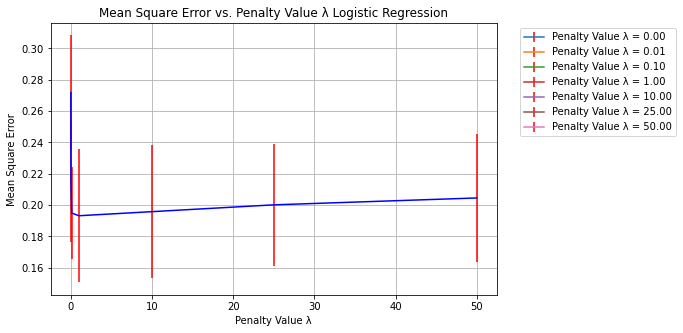

In [7]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
#C_range = [1e-5*(10**i) for i in range(8)] 
C_range = [1e-3, 0.01 , 0.1 , 1 , 10 , 25,50]
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value %s = %1.2f" % (chr(955),C_range[i]))
plt.xlabel("Penalty Value %s" % chr(955))
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value %s Logistic Regression" % chr(955))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()
plt.savefig('./../Plots/cross_val.png' , bbox_inches='tight' , dpi = 200)

In [8]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 0.05 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

In [9]:
X_train.shape

(1144, 207)

In [10]:
sum((abs(model.coef_) >= 0.1 )[0])

112

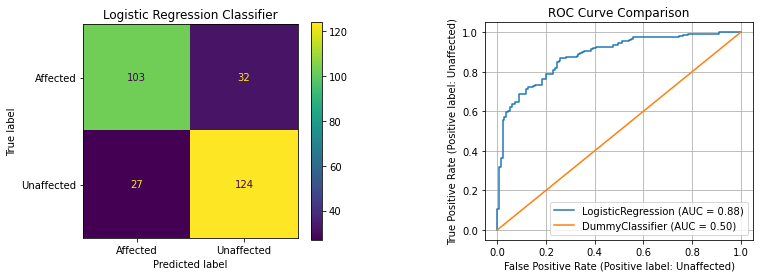

In [11]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax[1])
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax[1])
ax[1].set_title('ROC Curve Comparison')
plt.grid()
ax[0].set_title('Logistic Regression Classifier')
plt.savefig('./../Plots/log_reg_all.png')

In [12]:
df2 = pd.DataFrame([X_train.columns , model.coef_[0]]).T

df2['abs'] = abs(df2[1])

df2.sort_values(by = 'abs').iloc[-10: , 0:2].to_csv('./../outputData/gPD_all_ft.csv')

In [13]:
df2.sort_values(by = 'abs').iloc[-10: , 0:2]

,0,1
140,ENSG00000152484.13,0.306648
28,ENSG00000285215.2,-0.308379
126,ENSG00000189134.3,-0.315774
119,ENSG00000136938.8,0.332443
90,ENSG00000043093.13,0.334492
178,ENSG00000176749.8,0.336317
189,ENSG00000232487.1,0.361736
143,ENSG00000029153.14,0.373593
175,ENSG00000092964.17,0.395769
111,ENSG00000147408.14,-0.477802


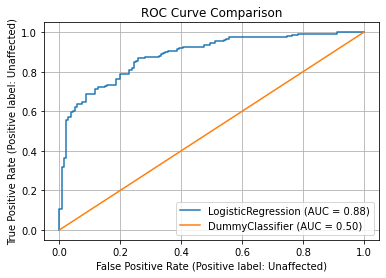

In [14]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [15]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 79.37%


## Classifying Affected vs. Unaffected at BL

In [16]:
df_BL = df[df['meta_df.Clinical_Event'] == 'BL']
X = df_BL.iloc[:,1:208]
y = df_BL.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

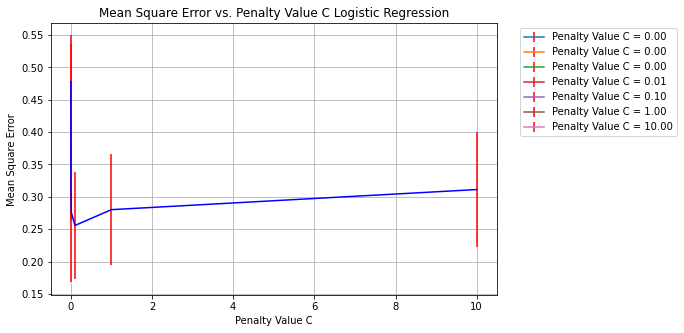

In [17]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
C_range = [1e-5*(10**i) for i in range(7)] 
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value C = %1.2f" % C_range[i])
plt.xlabel("Penalty Value C")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value C Logistic Regression")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [18]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 0.1 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

Text(0.5, 1.0, 'Dummy Classifier')

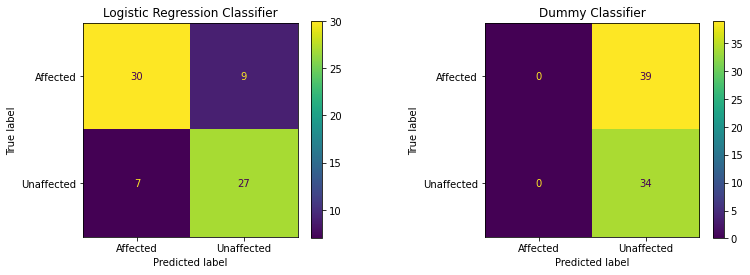

In [19]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_confusion_matrix(dummy_model , X_test , y_test , ax = ax[1])
ax[0].set_title('Logistic Regression Classifier')
ax[1].set_title('Dummy Classifier')

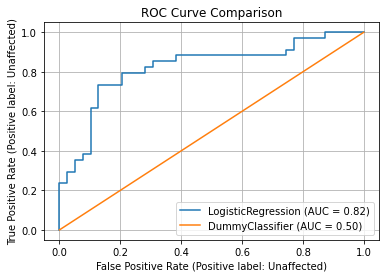

In [20]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [21]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 78.08%


## Classifying Affected vs. Unaffected at V02

In [22]:
df_V02 = df[df['meta_df.Clinical_Event'] == 'V02']
X = df_V02.iloc[:,1:208]
y = df_V02.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

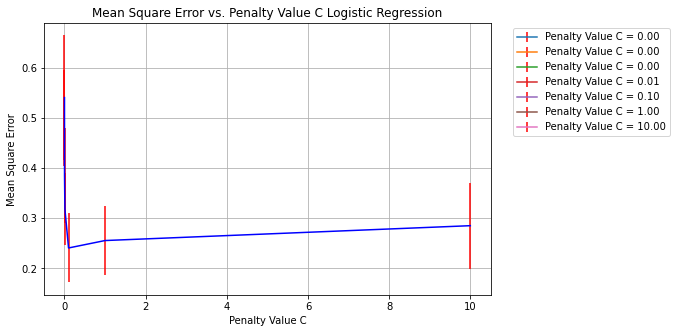

In [23]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
C_range = [1e-5*(10**i) for i in range(7)] 
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value C = %1.2f" % C_range[i])
plt.xlabel("Penalty Value C")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value C Logistic Regression")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [24]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 1 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

Text(0.5, 1.0, 'Dummy Classifier')

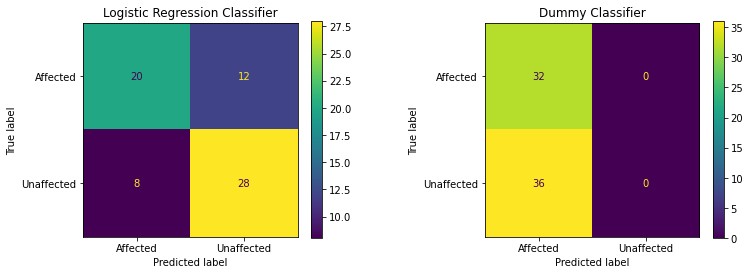

In [25]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_confusion_matrix(dummy_model , X_test , y_test , ax = ax[1])
ax[0].set_title('Logistic Regression Classifier')
ax[1].set_title('Dummy Classifier')

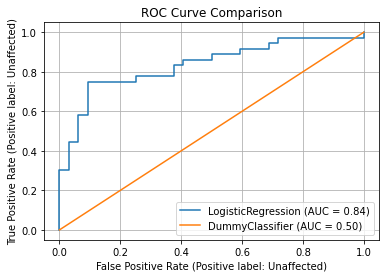

In [26]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [27]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 70.59%


## Classifying Affected vs. Unaffected at V04

In [28]:
df_V04 = df[df['meta_df.Clinical_Event'] == 'V04']
X = df_V04.iloc[:,1:208]
y = df_V04.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

In [29]:
X_train.shape

(248, 207)

In [30]:
X_test.shape

(63, 207)

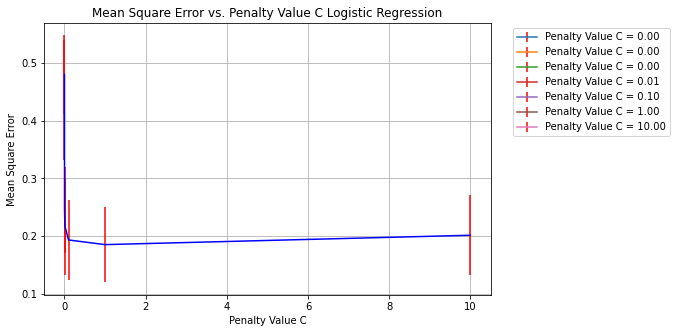

In [31]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
C_range = [1e-5*(10**i) for i in range(7)] 
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value C = %1.2f" % C_range[i])
plt.xlabel("Penalty Value C")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value C Logistic Regression")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [32]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 0.1 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

In [33]:
sum((abs(model.coef_) >= 0.1 )[0])

86

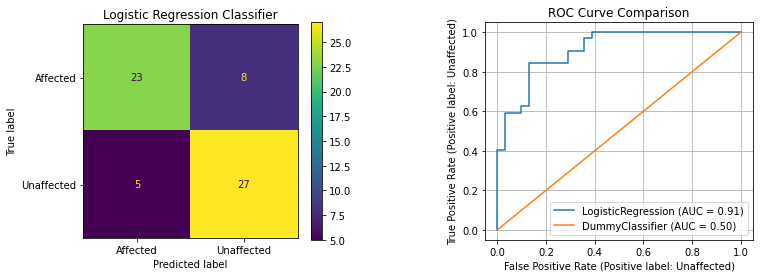

In [34]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax[1])
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax[1])
ax[1].set_title('ROC Curve Comparison')
plt.grid()
ax[0].set_title('Logistic Regression Classifier')
plt.savefig('./../Plots/log_reg_all_V04.png')

In [35]:
sum(df2['abs'] > 0.1)

112

In [36]:
df.describe()

,ENSG00000280828.1,ENSG00000257878.1,ENSG00000282988.2,ENSG00000149798.4,ENSG00000221869.4,ENSG00000196352.15,ENSG00000227598.1,ENSG00000171223.5,ENSG00000141337.12,ENSG00000184678.10,...,ENSG00000197256.10,ENSG00000130558.19,ENSG00000238243.3,ENSG00000201441.1,ENSG00000162722.8,ENSG00000184481.16,ENSG00000164176.12,ENSG00000224157.1,ENSG00000152078.9,ENSG00000177462.7
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,...,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000
mean,9.138661,9.176835,8.515193,6.641120,11.631165,12.699997,9.010141,12.157986,10.837185,11.721135,...,7.557649,6.302919,8.752905,5.923713,13.592040,11.717540,5.620170,6.190911,9.083385,5.495073
std,0.307026,0.546750,0.535991,0.404364,0.577459,0.465721,0.409755,0.469211,0.352035,0.401085,...,0.765960,0.690500,0.906544,0.312452,0.955142,0.684352,0.830359,0.373008,0.698312,0.505885
min,8.062668,6.698052,6.620829,5.222288,9.505731,11.311268,7.748311,10.418411,9.650263,10.226088,...,5.325021,4.582459,6.138775,4.838870,10.607333,9.331489,4.196174,4.934887,6.728523,4.196174
25%,8.941838,8.837887,8.152505,6.384739,11.242341,12.391827,8.726463,11.864988,10.608702,11.453729,...,7.055112,5.821373,8.143187,5.716306,12.967996,11.242123,4.988158,5.935387,8.597719,5.146999
50%,9.142400,9.171416,8.487630,6.635645,11.632328,12.681375,9.004817,12.150073,10.838065,11.744726,...,7.518085,6.201912,8.737564,5.939952,13.620049,11.709783,5.474929,6.174311,9.067442,5.483570
75%,9.348660,9.547056,8.861746,6.890308,12.001730,13.005582,9.280904,12.456261,11.076331,11.992669,...,7.999125,6.660407,9.360378,6.140409,14.240718,12.162743,6.155791,6.420022,9.546211,5.790785
max,10.299789,11.643229,10.719679,8.195651,14.778827,14.876264,10.707212,14.031863,12.222083,13.018638,...,11.153061,8.890982,12.108181,6.946156,17.186763,14.256471,9.213010,7.911972,11.855794,7.632775


In [37]:
77/208

0.3701923076923077

In [38]:
df2 = pd.DataFrame([X_train.columns , model.coef_[0]]).T

df2['abs'] = abs(df2[1])

df2.sort_values(by = 'abs').iloc[-10: , 0:2]#.to_csv('./../outputData/gPD_V04_ft.csv')

,0,1
87,ENSG00000224152.1,0.251328
90,ENSG00000043093.13,0.258742
165,ENSG00000128487.16,0.259026
101,ENSG00000145354.11,0.261484
110,ENSG00000008438.4,-0.263216
0,ENSG00000280828.1,-0.295371
59,ENSG00000197471.11,0.299462
111,ENSG00000147408.14,-0.374531
119,ENSG00000136938.8,0.433707
190,ENSG00000275708.1,-0.459804


In [39]:
df2.sort_values(by = 'abs').iloc[-10: , 0:2]

,0,1
87,ENSG00000224152.1,0.251328
90,ENSG00000043093.13,0.258742
165,ENSG00000128487.16,0.259026
101,ENSG00000145354.11,0.261484
110,ENSG00000008438.4,-0.263216
0,ENSG00000280828.1,-0.295371
59,ENSG00000197471.11,0.299462
111,ENSG00000147408.14,-0.374531
119,ENSG00000136938.8,0.433707
190,ENSG00000275708.1,-0.459804


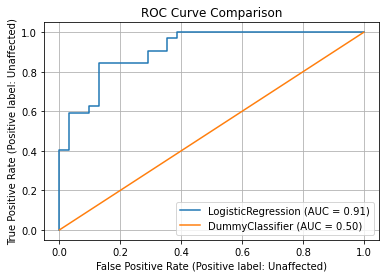

In [40]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [41]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 79.37%


## Classifying Affected vs. Unaffected at V06

In [42]:
df_V06 = df[df['meta_df.Clinical_Event'] == 'V06']
X = df_V06.iloc[:,1:208]
y = df_V06.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

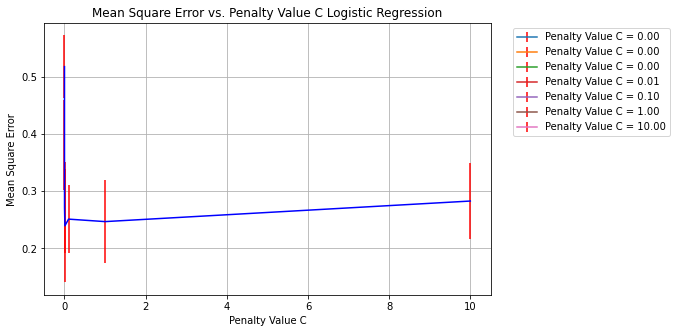

In [43]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
C_range = [1e-5*(10**i) for i in range(7)] 
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value C = %1.2f" % C_range[i])
plt.xlabel("Penalty Value C")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value C Logistic Regression")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [44]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 1 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

Text(0.5, 1.0, 'Dummy Classifier')

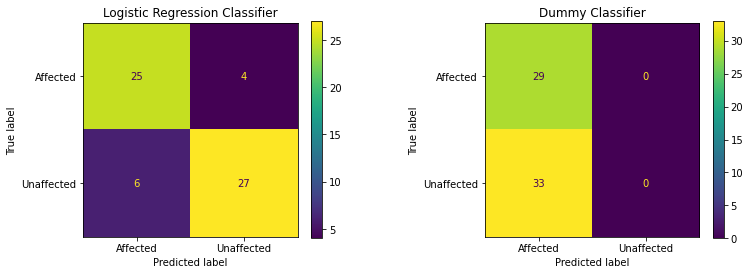

In [45]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_confusion_matrix(dummy_model , X_test , y_test , ax = ax[1])
ax[0].set_title('Logistic Regression Classifier')
ax[1].set_title('Dummy Classifier')

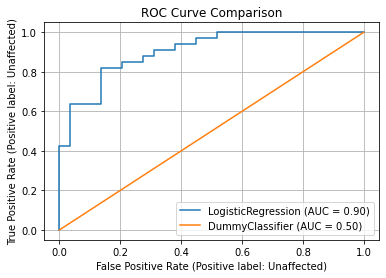

In [46]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [47]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 83.87%


## Classifying Affected vs. Unaffected at V08

In [48]:
df_V08 = df[df['meta_df.Clinical_Event'] == 'V08']
X = df_V08.iloc[:,1:208]
y = df_V08.iloc[: , -1] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

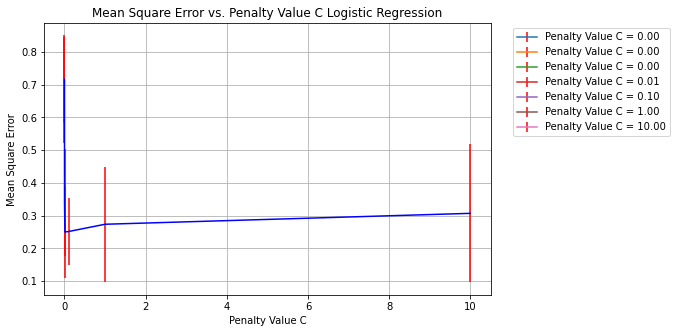

In [49]:
mean_error = []
std_error = []
y_train_float = [(i == 'Affected')*1 for i in y_train]
C_range = [1e-5*(10**i) for i in range(7)] 
for item in C_range : 
    output = logistic_cross_val(item , np.array(X_train) , np.array(y_train_float))
    mean_error.append(output[0])
    std_error.append(output[1])

fig , ax = plt.subplots(figsize = (8,5))
plt.plot(C_range , mean_error, c = 'b')
for i in range(len(C_range)) : 
    ax.errorbar(C_range[i] , mean_error[i] , yerr=std_error[i] , ecolor='r' , label = "Penalty Value C = %1.2f" % C_range[i])
plt.xlabel("Penalty Value C")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error vs. Penalty Value C Logistic Regression")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [50]:
model = sk.linear_model.LogisticRegression(penalty='l2' , C = 0.1 , max_iter=5000).fit(X_train , y_train)
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train , y_train)

Text(0.5, 1.0, 'Dummy Classifier')

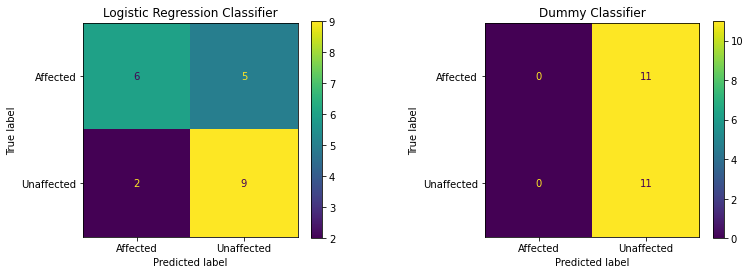

In [51]:
fig , ax = plt.subplots(1,2 , gridspec_kw={'hspace': .1 , 'wspace': .5})
fig.set_figwidth(12)
sk.metrics.plot_confusion_matrix(model , X_test , y_test , ax = ax[0])
sk.metrics.plot_confusion_matrix(dummy_model , X_test , y_test , ax = ax[1])
ax[0].set_title('Logistic Regression Classifier')
ax[1].set_title('Dummy Classifier')

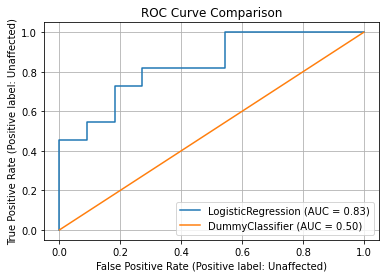

In [52]:
fig , ax = plt.subplots()
sk.metrics.plot_roc_curve(model , X_test , y_test , ax = ax)
sk.metrics.plot_roc_curve(dummy_model , X_test , y_test , ax = ax)
ax.set_title('ROC Curve Comparison')
plt.grid()

In [53]:
print('The test accuracy is %2.2f%%' % (model.score(X_test , y_test)*100))

The test accuracy is 68.18%


## Classifying the Time from which a sample came

In [54]:
from sklearn import svm

X = df.iloc[:,1:208]
y = df.iloc[: , -2] 
X_train , X_test , y_train , y_test = sk.model_selection.train_test_split(X , y , test_size = 0.2)

clf = svm.SVC(decision_function_shape='ovo', C=50)
clf.fit(X_train , y_train)

SVC(C=50, decision_function_shape='ovo')

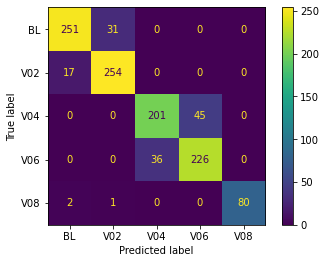

In [55]:
sk.metrics.plot_confusion_matrix(clf , X_train , y_train)

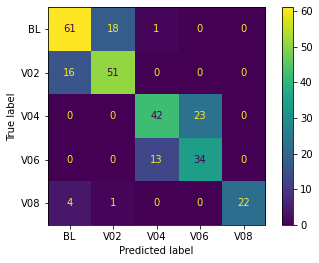

In [56]:
sk.metrics.plot_confusion_matrix(clf , X_test , y_test)